In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the CREDIT CARD PROBLEM dataset

Credit_card= pd.read_csv(r"C:\Users\Dlc\null.csv",header=0)

# Copy to back-uo file

Credit_card_bk = Credit_card.copy()

# Display first 5 records

Credit_card.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
#DISPLAYS ALL THE VALUES OF "INDUSTRY"
Credit_card['Industry'].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [4]:
#displays the CREDIT CARD data
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
#convert categorical variable into int
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Credit_card['Industry']=LE.fit_transform(Credit_card['Industry'])

In [6]:
#convert categorical variable into int
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Credit_card['Ethnicity']=LE.fit_transform(Credit_card['Ethnicity'])

In [7]:
#convert categorical variable into int
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Credit_card['Citizen']=LE.fit_transform(Credit_card['Citizen'])

In [8]:
#DISPLAYS THE TOTAL INFORMATION OF DATASET
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int32  
 6   Ethnicity       690 non-null    int32  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int32  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int32(3), int64(10)
memory usage: 78.3 KB


In [9]:
#displays unique values
Credit_card.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [10]:
#displays about the null values in data
Credit_card.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [11]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

Approved_count = Credit_card. Approved.value_counts()
print('Class 0:', Approved_count[0])
print('Class 1:', Approved_count[1])
print('Proportion:', round(Approved_count[0] / Approved_count[1], 2), ': 1')
print('Total Credit-Card  records:', len(Credit_card))

Class 0: 383
Class 1: 307
Proportion: 1.25 : 1
Total Credit-Card  records: 690


In [12]:
#displays number of values in data set
Credit_card.shape

(690, 16)

In [13]:
#check if there are duplicate rows in dataset
#display the duplicate records with in loan dataset,if available

Credit_card_dup=Credit_card[Credit_card.duplicated(keep='last')]
Credit_card_dup                     

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved


In [14]:
#GIVES BOOLEAN RESULT IF ANY DUPLICATES WAS FOUND
Credit_card.duplicated().any()

False

In [15]:
#identify the independent and target (dependent) variables

IndepVar =[]
for col in Credit_card.columns:
    if col !='Approved':
        IndepVar.append(col)
        
TargetVar='Approved'

x=Credit_card[IndepVar]
y=Credit_card[TargetVar]

In [16]:
#split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#display the shape for train &test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((483, 15), (207, 15), (483,), (207,))

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [18]:
# Load the CUSTOMER CHURN PROBLEM dataset

KNN_Results= pd.read_csv(r"C:\Users\Dlc\KNN_Results.csv" ,header=0)


# Display first 5 records

KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN ALGORITHM

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[75 22]
 [19 91]]
Outcome values : 
 75 22 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.77      0.79        97
           0       0.81      0.83      0.82       110

    accuracy                           0.80       207
   macro avg       0.80      0.80      0.80       207
weighted avg       0.80      0.80      0.80       207

Accuracy : 80.2 %
Precision : 79.8 %
Recall : 77.3 %
F1 Score : 0.785
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 80.0 %
MCC : 0.602
roc_auc_score: 0.8


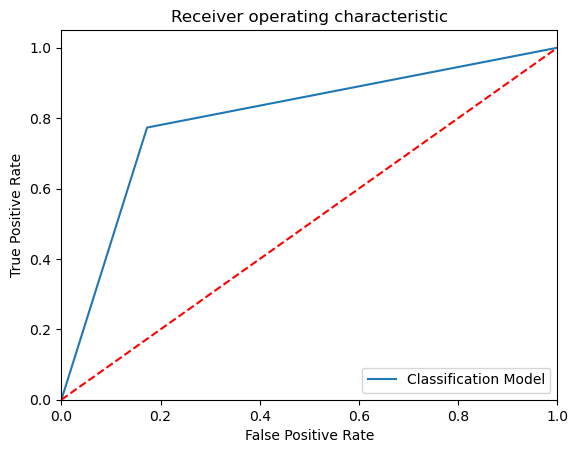

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 63  34]
 [  9 101]]
Outcome values : 
 63 34 9 101
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.65      0.75        97
           0       0.75      0.92      0.82       110

    accuracy                           0.79       207
   macro avg       0.81      0.78      0.79       207
weighted avg       0.81      0.79      0.79       207

Accuracy : 79.2 %
Precision : 87.5 %
Recall : 64.9 %
F1 Score : 0.746
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 78.4 %
MCC : 0.595
roc_auc_score: 0.784


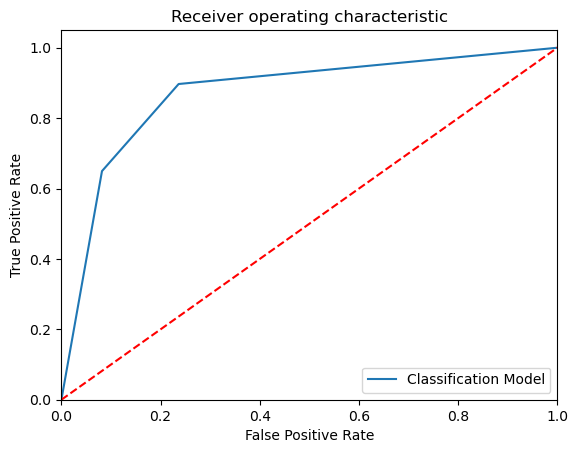

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[85 12]
 [13 97]]
Outcome values : 
 85 12 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.88      0.87        97
           0       0.89      0.88      0.89       110

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207

Accuracy : 87.9 %
Precision : 86.7 %
Recall : 87.6 %
F1 Score : 0.872
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 87.9 %
MCC : 0.758
roc_auc_score: 0.879


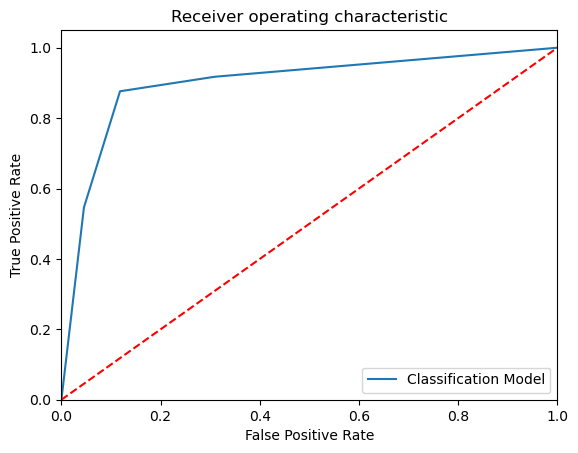

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 73  24]
 [ 10 100]]
Outcome values : 
 73 24 10 100
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.75      0.81        97
           0       0.81      0.91      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.83      0.83       207
weighted avg       0.84      0.84      0.83       207

Accuracy : 83.6 %
Precision : 88.0 %
Recall : 75.3 %
F1 Score : 0.811
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 83.1 %
MCC : 0.674
roc_auc_score: 0.831


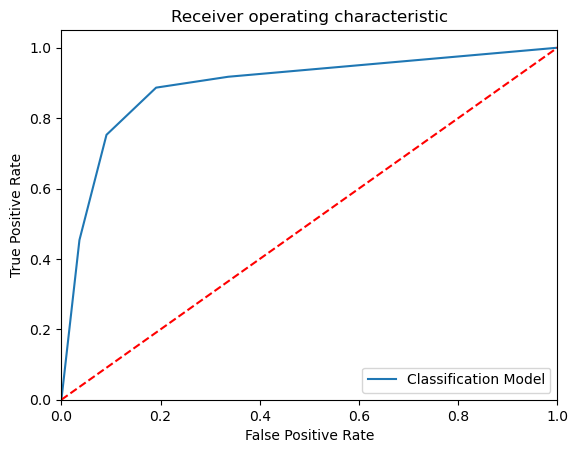

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[82 15]
 [15 95]]
Outcome values : 
 82 15 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.85      0.85        97
           0       0.86      0.86      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 84.5 %
Recall : 84.5 %
F1 Score : 0.845
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 85.4 %
MCC : 0.709
roc_auc_score: 0.854


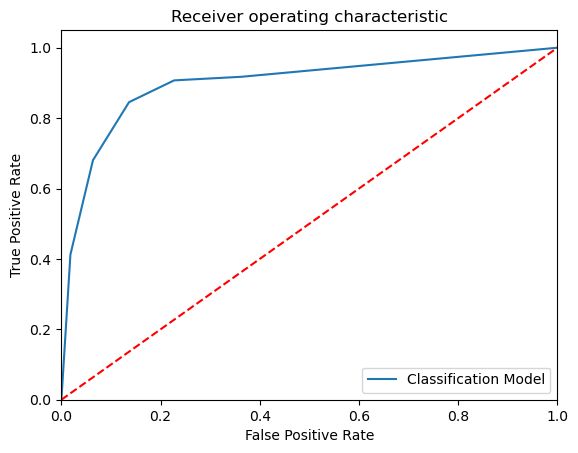

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[79 18]
 [11 99]]
Outcome values : 
 79 18 11 99
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.81      0.84        97
           0       0.85      0.90      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 87.8 %
Recall : 81.4 %
F1 Score : 0.845
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 85.7 %
MCC : 0.719
roc_auc_score: 0.857


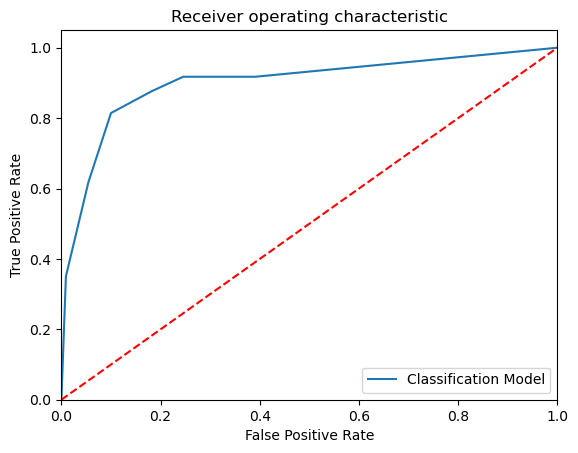

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[82 15]
 [19 91]]
Outcome values : 
 82 15 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.85      0.83        97
           0       0.86      0.83      0.84       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 83.6 %
Precision : 81.2 %
Recall : 84.5 %
F1 Score : 0.828
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 83.6 %
MCC : 0.672
roc_auc_score: 0.836


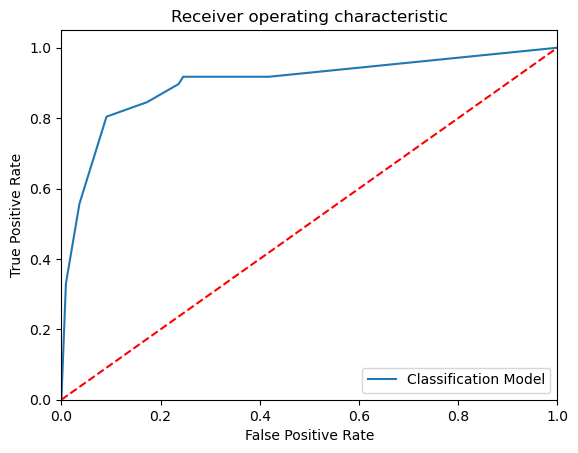

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[81 16]
 [17 93]]
Outcome values : 
 81 16 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.83        97
           0       0.85      0.85      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 84.1 %
Precision : 82.7 %
Recall : 83.5 %
F1 Score : 0.831
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 84.0 %
MCC : 0.68
roc_auc_score: 0.84


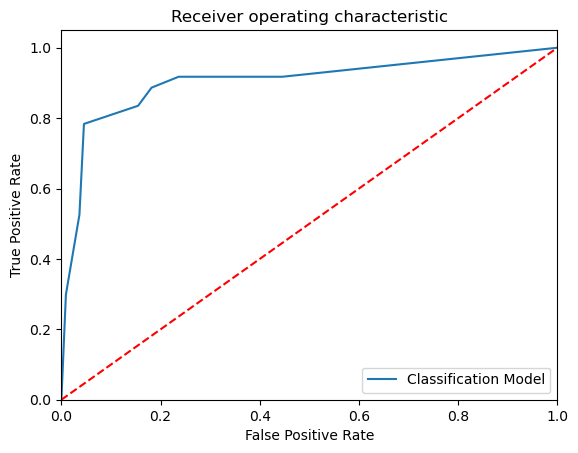

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[85 12]
 [20 90]]
Outcome values : 
 85 12 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.88      0.84        97
           0       0.88      0.82      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.0 %
Recall : 87.6 %
F1 Score : 0.842
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 84.7 %
MCC : 0.693
roc_auc_score: 0.847


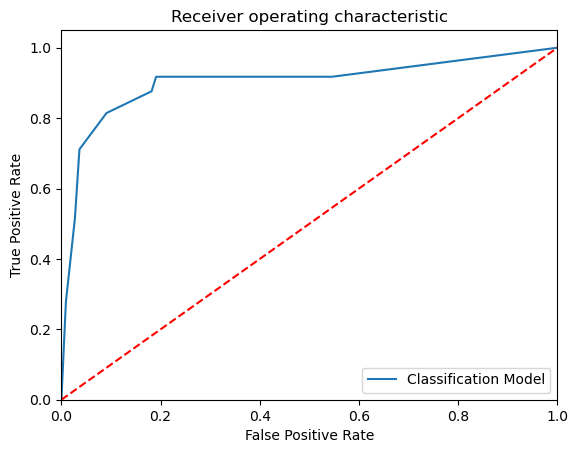

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[84 13]
 [15 95]]
Outcome values : 
 84 13 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.87      0.86        97
           0       0.88      0.86      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 84.8 %
Recall : 86.6 %
F1 Score : 0.857
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 86.5 %
MCC : 0.729
roc_auc_score: 0.865


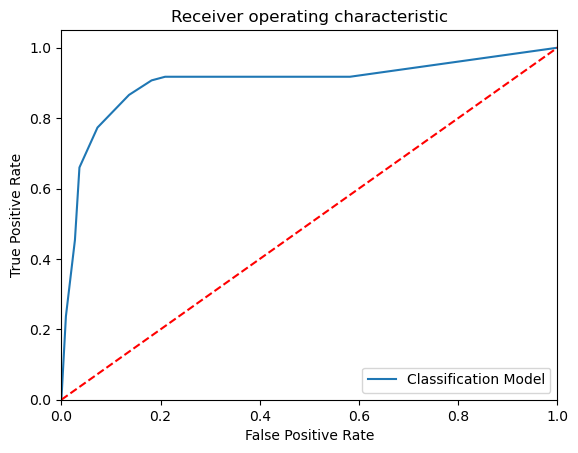

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[87 10]
 [18 92]]
Outcome values : 
 87 10 18 92
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.90      0.86        97
           0       0.90      0.84      0.87       110

    accuracy                           0.86       207
   macro avg       0.87      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 82.9 %
Recall : 89.7 %
F1 Score : 0.861
Specificity or True Negative Rate : 83.6 %
Balanced Accuracy : 86.6 %
MCC : 0.732
roc_auc_score: 0.867


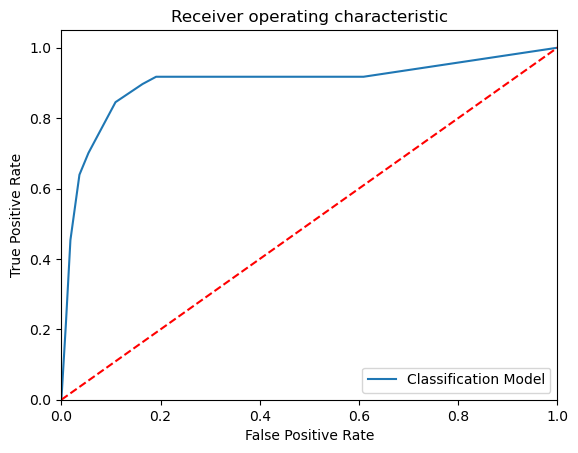

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[86 11]
 [17 93]]
Outcome values : 
 86 11 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           0       0.89      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 83.5 %
Recall : 88.7 %
F1 Score : 0.86
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 86.6 %
MCC : 0.731
roc_auc_score: 0.866


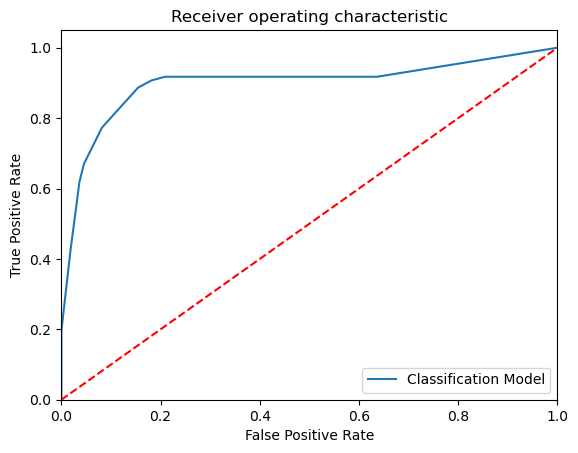

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[87 10]
 [20 90]]
Outcome values : 
 87 10 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.90      0.85        97
           0       0.90      0.82      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 81.3 %
Recall : 89.7 %
F1 Score : 0.853
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 85.7 %
MCC : 0.714
roc_auc_score: 0.858


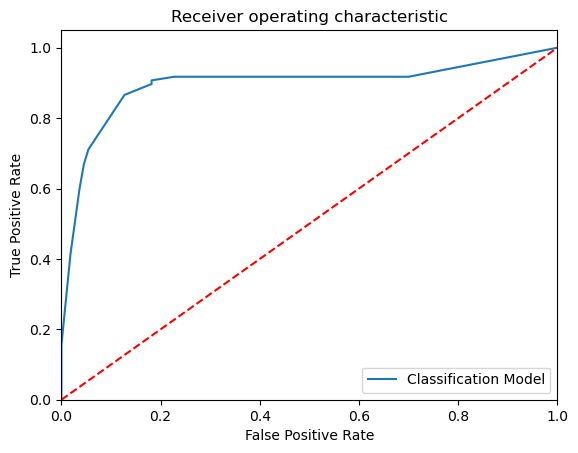

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[86 11]
 [17 93]]
Outcome values : 
 86 11 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           0       0.89      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 83.5 %
Recall : 88.7 %
F1 Score : 0.86
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 86.6 %
MCC : 0.731
roc_auc_score: 0.866


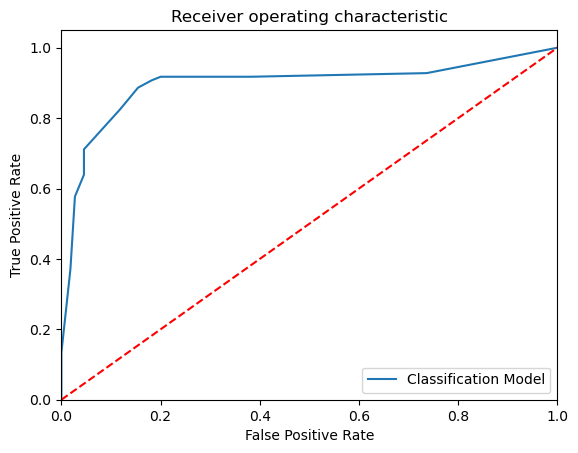

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[87 10]
 [19 91]]
Outcome values : 
 87 10 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        97
           0       0.90      0.83      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 82.1 %
Recall : 89.7 %
F1 Score : 0.857
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 86.2 %
MCC : 0.723
roc_auc_score: 0.862


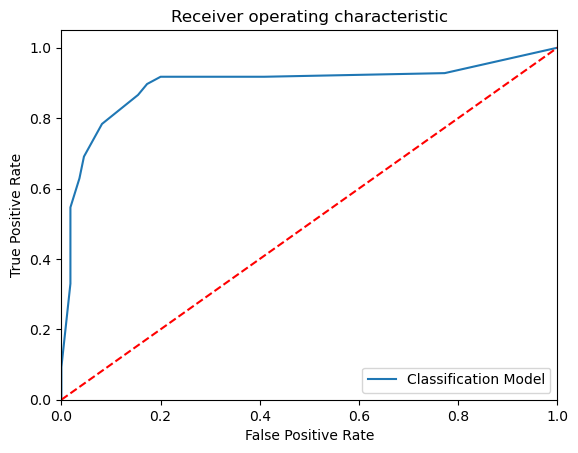

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[84 13]
 [19 91]]
Outcome values : 
 84 13 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.6 %
Recall : 86.6 %
F1 Score : 0.84
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.847


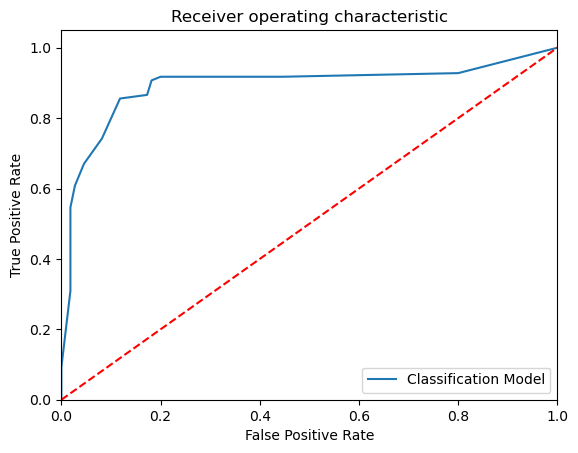

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[86 11]
 [20 90]]
Outcome values : 
 86 11 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.89      0.85        97
           0       0.89      0.82      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 81.1 %
Recall : 88.7 %
F1 Score : 0.847
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 85.2 %
MCC : 0.704
roc_auc_score: 0.852


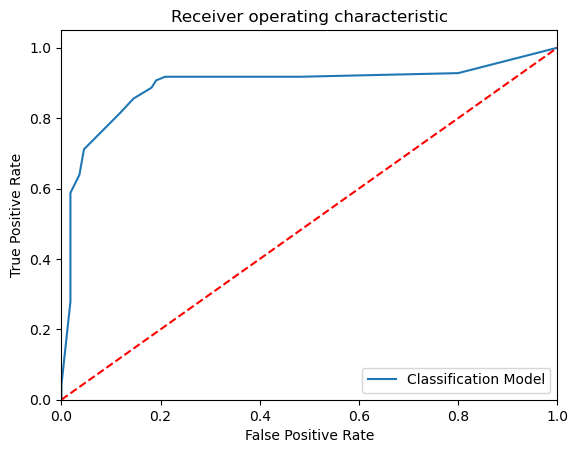

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[85 12]
 [16 94]]
Outcome values : 
 85 12 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.88      0.86        97
           0       0.89      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 84.2 %
Recall : 87.6 %
F1 Score : 0.859
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 86.5 %
MCC : 0.73
roc_auc_score: 0.865


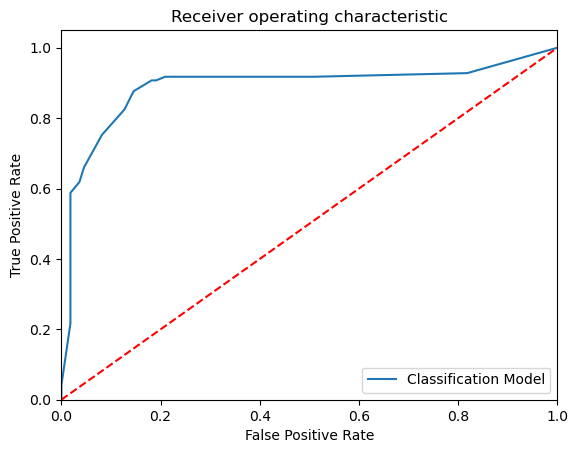

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[86 11]
 [19 91]]
Outcome values : 
 86 11 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.89      0.85        97
           0       0.89      0.83      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 81.9 %
Recall : 88.7 %
F1 Score : 0.851
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 85.7 %
MCC : 0.713
roc_auc_score: 0.857


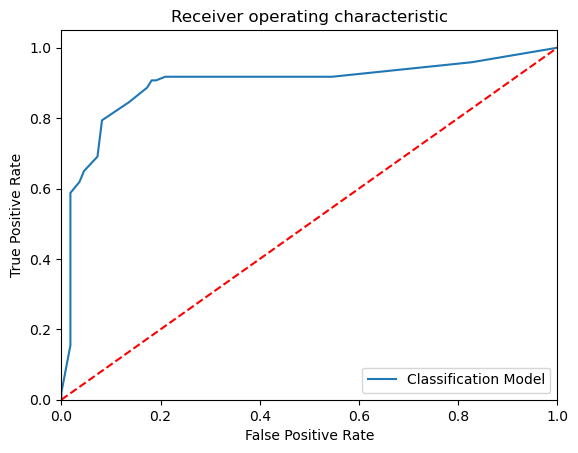

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[83 14]
 [17 93]]
Outcome values : 
 83 14 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.86      0.84        97
           0       0.87      0.85      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 83.0 %
Recall : 85.6 %
F1 Score : 0.843
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 85.0 %
MCC : 0.7
roc_auc_score: 0.851


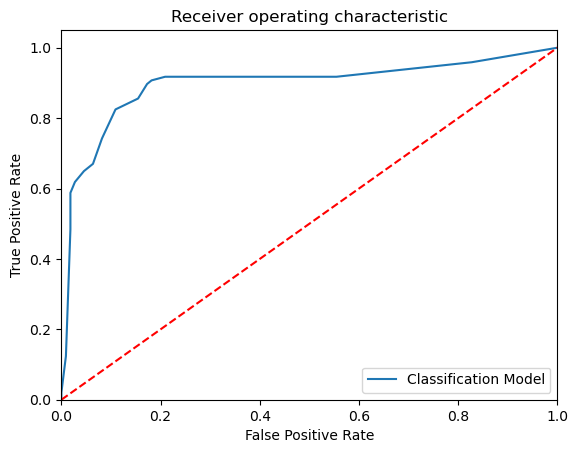

In [19]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [20]:
#DISPLAY RESULTS OF KNN
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,75,22,19,91,0.802,0.798,0.773,0.785,0.827,0.602,0.800234,0.800
1,KNeighborsClassifier(n_neighbors=2),2,63,34,9,101,0.792,0.875,0.649,0.746,0.918,0.595,0.783833,0.784
2,KNeighborsClassifier(n_neighbors=3),3,85,12,13,97,0.879,0.867,0.876,0.872,0.882,0.758,0.879053,0.879
3,KNeighborsClassifier(n_neighbors=4),4,73,24,10,100,0.836,0.880,0.753,0.811,0.909,0.674,0.830834,0.831
4,KNeighborsClassifier(),5,82,15,15,95,0.855,0.845,0.845,0.845,0.864,0.709,0.854499,0.854
5,KNeighborsClassifier(n_neighbors=6),6,79,18,11,99,0.860,0.878,0.814,0.845,0.900,0.719,0.857216,0.857
6,KNeighborsClassifier(n_neighbors=7),7,82,15,19,91,0.836,0.812,0.845,0.828,0.827,0.672,0.836317,0.836
7,KNeighborsClassifier(n_neighbors=8),8,81,16,17,93,0.841,0.827,0.835,0.831,0.845,0.680,0.840253,0.840
8,KNeighborsClassifier(n_neighbors=9),9,85,12,20,90,0.845,0.810,0.876,0.842,0.818,0.693,0.847235,0.847
9,KNeighborsClassifier(n_neighbors=10),10,84,13,15,95,0.865,0.848,0.866,0.857,0.864,0.729,0.864808,0.865


In [21]:
# Load the CREDIT CARD PROBLEM dataset

EMResults1= pd.read_csv(r"C:\Users\Dlc\EMResults (1).csv" ,header=0)


# Display first 5 records

EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVC ALGORITHM

# LINEAR

Model Name:  SVM - Linear
Confusion matrix : 
 [[89  8]
 [25 85]]
Outcome values : 
 89 8 25 85
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.92      0.84        97
           0       0.91      0.77      0.84       110

    accuracy                           0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 84.1 %
Precision : 78.1 %
Recall : 91.8 %
F1 Score : 0.844
Specificity or True Negative Rate : 77.3 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.845


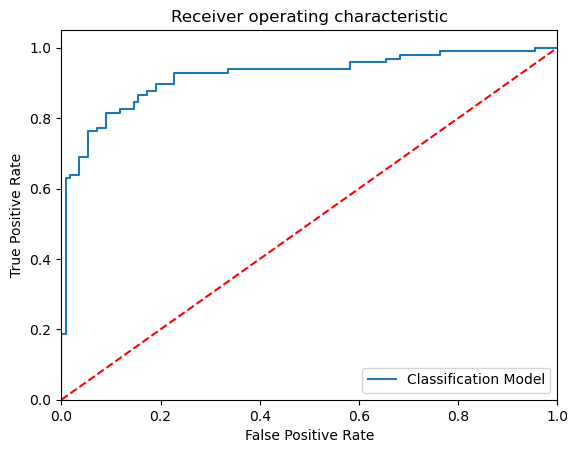

-----------------------------------------------------------------------------------------------------


In [22]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# POLY

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[86 11]
 [21 89]]
Outcome values : 
 86 11 21 89
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84        97
           0       0.89      0.81      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 80.4 %
Recall : 88.7 %
F1 Score : 0.843
Specificity or True Negative Rate : 80.9 %
Balanced Accuracy : 84.8 %
MCC : 0.695
roc_auc_score: 0.848


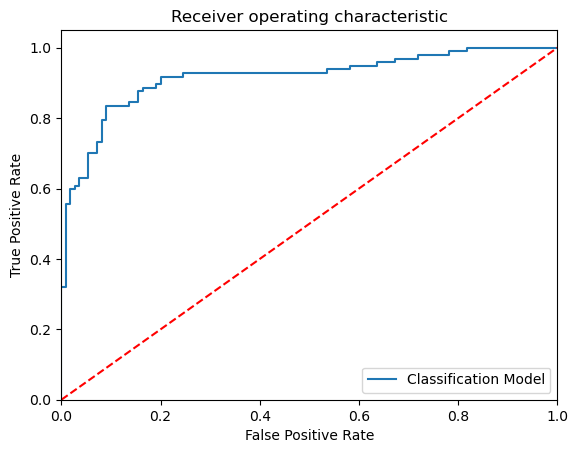

-----------------------------------------------------------------------------------------------------


In [23]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SIGMOID

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[43 54]
 [44 66]]
Outcome values : 
 43 54 44 66
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.44      0.47        97
           0       0.55      0.60      0.57       110

    accuracy                           0.53       207
   macro avg       0.52      0.52      0.52       207
weighted avg       0.52      0.53      0.52       207

Accuracy : 52.7 %
Precision : 49.4 %
Recall : 44.3 %
F1 Score : 0.467
Specificity or True Negative Rate : 60.0 %
Balanced Accuracy : 52.2 %
MCC : 0.044
roc_auc_score: 0.522


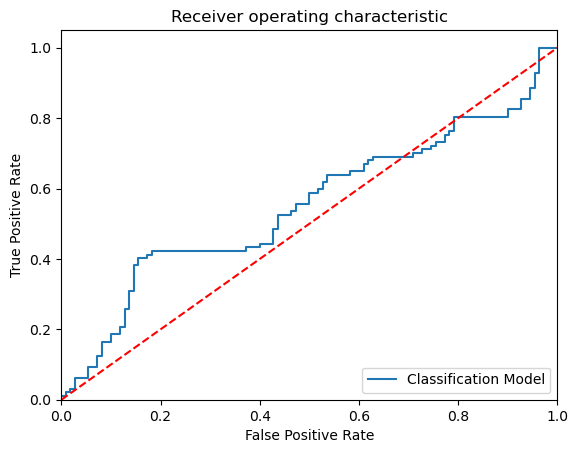

-----------------------------------------------------------------------------------------------------


In [24]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# GAUSSIAN

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[89  8]
 [25 85]]
Outcome values : 
 89 8 25 85
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.92      0.84        97
           0       0.91      0.77      0.84       110

    accuracy                           0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 84.1 %
Precision : 78.1 %
Recall : 91.8 %
F1 Score : 0.844
Specificity or True Negative Rate : 77.3 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.845


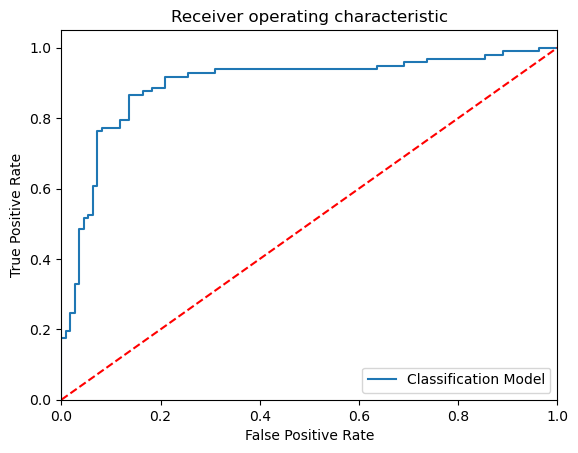

-----------------------------------------------------------------------------------------------------


In [25]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# CLASSIFICATON ALGORITHM

Model Name:  LogisticRegression()
Confusion matrix : 
 [[87 10]
 [24 86]]
Outcome values : 
 87 10 24 86
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.90      0.84        97
           0       0.90      0.78      0.83       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 83.6 %
Precision : 78.4 %
Recall : 89.7 %
F1 Score : 0.837
Specificity or True Negative Rate : 78.2 %
Balanced Accuracy : 84.0 %
MCC : 0.679
roc_auc_score: 0.839


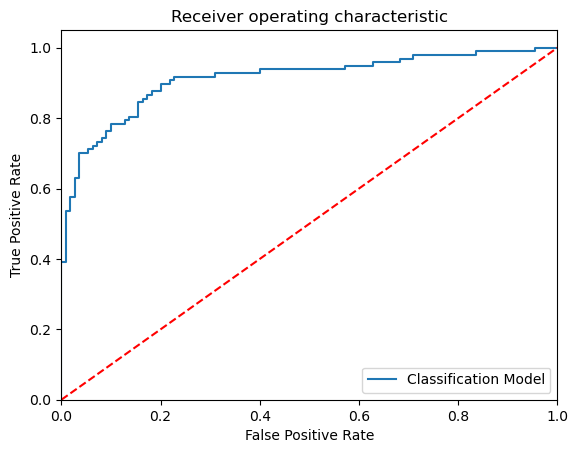

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[74 23]
 [17 93]]
Outcome values : 
 74 23 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.76      0.79        97
           0       0.80      0.85      0.82       110

    accuracy                           0.81       207
   macro avg       0.81      0.80      0.81       207
weighted avg       0.81      0.81      0.81       207

Accuracy : 80.7 %
Precision : 81.3 %
Recall : 76.3 %
F1 Score : 0.787
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 80.4 %
MCC : 0.612
roc_auc_score: 0.804


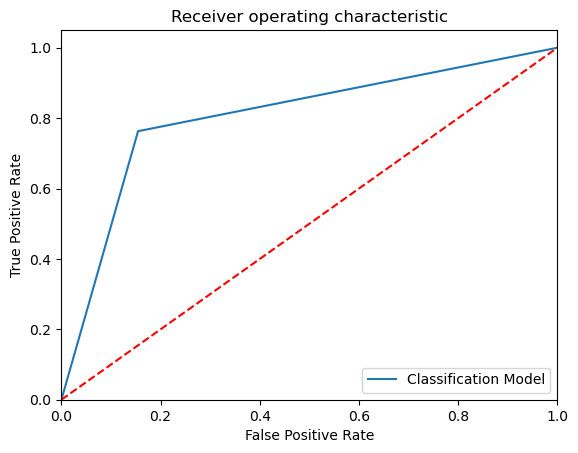

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[85 12]
 [14 96]]
Outcome values : 
 85 12 14 96
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.88      0.87        97
           0       0.89      0.87      0.88       110

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Accuracy : 87.4 %
Precision : 85.9 %
Recall : 87.6 %
F1 Score : 0.867
Specificity or True Negative Rate : 87.3 %
Balanced Accuracy : 87.4 %
MCC : 0.748
roc_auc_score: 0.875


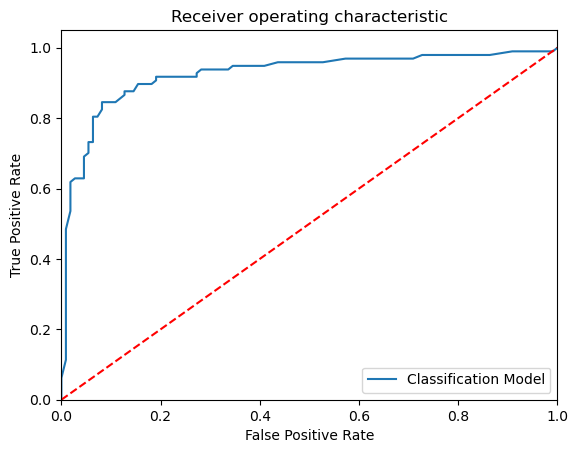

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[85 12]
 [15 95]]
Outcome values : 
 85 12 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.88      0.86        97
           0       0.89      0.86      0.88       110

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Accuracy : 87.0 %
Precision : 85.0 %
Recall : 87.6 %
F1 Score : 0.863
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 87.0 %
MCC : 0.739
roc_auc_score: 0.87


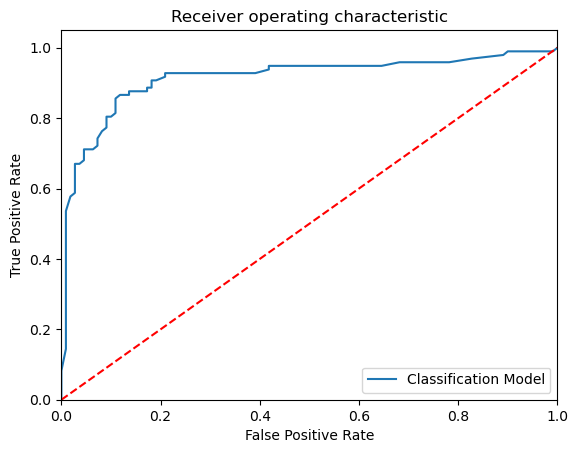

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[85 12]
 [13 97]]
Outcome values : 
 85 12 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.88      0.87        97
           0       0.89      0.88      0.89       110

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207

Accuracy : 87.9 %
Precision : 86.7 %
Recall : 87.6 %
F1 Score : 0.872
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 87.9 %
MCC : 0.758
roc_auc_score: 0.879


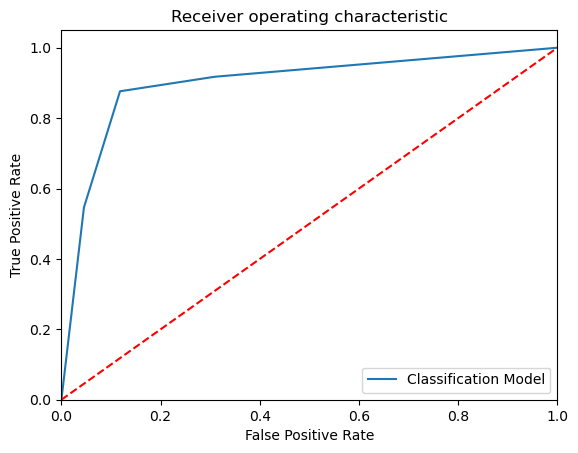

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)
Confusion matrix : 
 [[86 11]
 [19 91]]
Outcome values : 
 86 11 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.89      0.85        97
           0       0.89      0.83      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 81.9 %
Recall : 88.7 %
F1 Score : 0.851
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 85.7 %
MCC : 0.713
roc_auc_score: 0.857


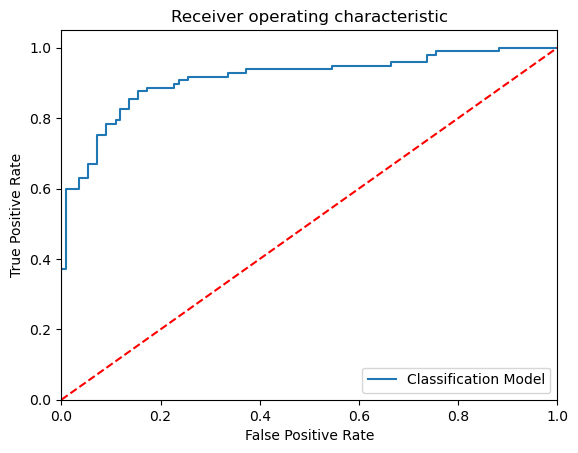

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 65  32]
 [  9 101]]
Outcome values : 
 65 32 9 101
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.67      0.76        97
           0       0.76      0.92      0.83       110

    accuracy                           0.80       207
   macro avg       0.82      0.79      0.80       207
weighted avg       0.82      0.80      0.80       207

Accuracy : 80.2 %
Precision : 87.8 %
Recall : 67.0 %
F1 Score : 0.76
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 79.4 %
MCC : 0.613
roc_auc_score: 0.794


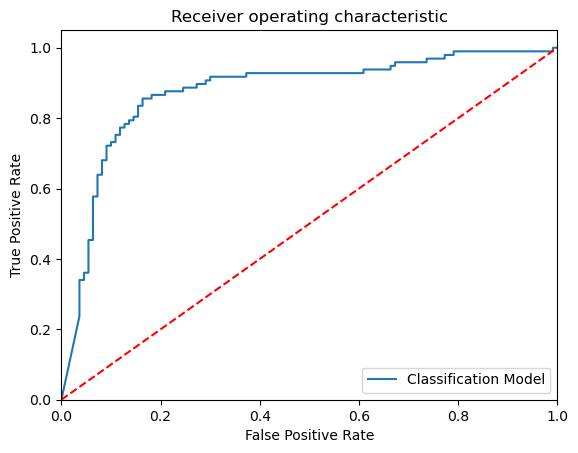

-----------------------------------------------------------------------------------------------------


In [26]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=3)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [27]:
EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,89,8,25,85,0.841,0.781,0.918,0.844,0.773,0.692,0.845127,0.846
1,SVM - Polynominal,86,11,21,89,0.845,0.804,0.887,0.843,0.809,0.695,0.847844,0.848
2,SVM - Sigmoid,43,54,44,66,0.527,0.494,0.443,0.467,0.600,0.044,0.521649,0.522
3,SVM - Gaussian,89,8,25,85,0.841,0.781,0.918,0.844,0.773,0.692,0.845127,0.846
4,LogisticRegression(),87,10,24,86,0.836,0.784,0.897,0.837,0.782,0.679,0.839363,0.840
5,DecisionTreeClassifier(),74,23,17,93,0.807,0.813,0.763,0.787,0.845,0.612,0.804171,0.804
6,"(DecisionTreeClassifier(max_features='auto', r...",85,12,14,96,0.874,0.859,0.876,0.867,0.873,0.748,0.874508,0.874
7,"(ExtraTreeClassifier(random_state=1245925802),...",85,12,15,95,0.870,0.850,0.876,0.863,0.864,0.739,0.869963,0.870
8,KNeighborsClassifier(n_neighbors=3),85,12,13,97,0.879,0.867,0.876,0.872,0.882,0.758,0.879053,0.879
9,"SVC(class_weight='balanced', kernel='poly', pr...",86,11,19,91,0.855,0.819,0.887,0.851,0.827,0.713,0.856935,0.857


# KNN ALGORITHM

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[75 22]
 [19 91]]
Outcome values : 
 75 22 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.77      0.79        97
           0       0.81      0.83      0.82       110

    accuracy                           0.80       207
   macro avg       0.80      0.80      0.80       207
weighted avg       0.80      0.80      0.80       207

Accuracy : 80.2 %
Precision : 79.8 %
Recall : 77.3 %
F1 Score : 0.785
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 80.0 %
MCC : 0.602
roc_auc_score: 0.8


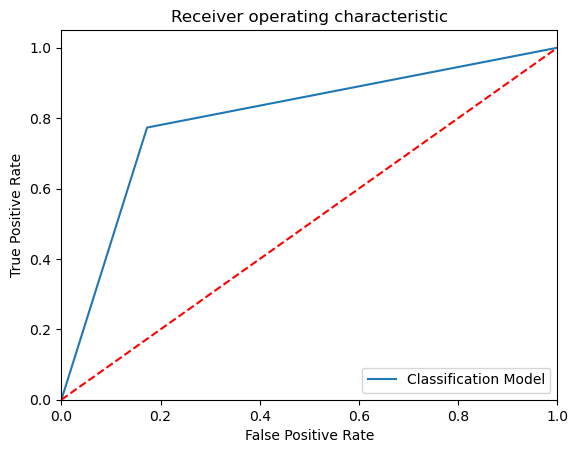

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 63  34]
 [  9 101]]
Outcome values : 
 63 34 9 101
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.65      0.75        97
           0       0.75      0.92      0.82       110

    accuracy                           0.79       207
   macro avg       0.81      0.78      0.79       207
weighted avg       0.81      0.79      0.79       207

Accuracy : 79.2 %
Precision : 87.5 %
Recall : 64.9 %
F1 Score : 0.746
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 78.4 %
MCC : 0.595
roc_auc_score: 0.784


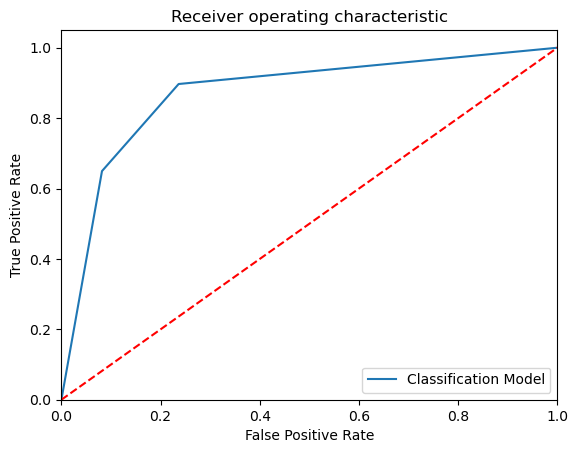

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[85 12]
 [13 97]]
Outcome values : 
 85 12 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.88      0.87        97
           0       0.89      0.88      0.89       110

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207

Accuracy : 87.9 %
Precision : 86.7 %
Recall : 87.6 %
F1 Score : 0.872
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 87.9 %
MCC : 0.758
roc_auc_score: 0.879


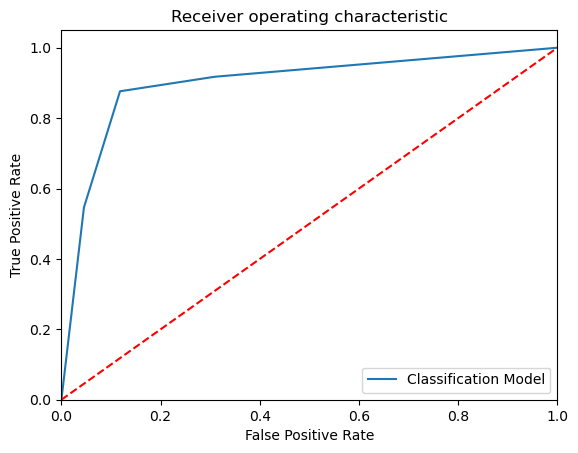

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 73  24]
 [ 10 100]]
Outcome values : 
 73 24 10 100
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.75      0.81        97
           0       0.81      0.91      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.83      0.83       207
weighted avg       0.84      0.84      0.83       207

Accuracy : 83.6 %
Precision : 88.0 %
Recall : 75.3 %
F1 Score : 0.811
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 83.1 %
MCC : 0.674
roc_auc_score: 0.831


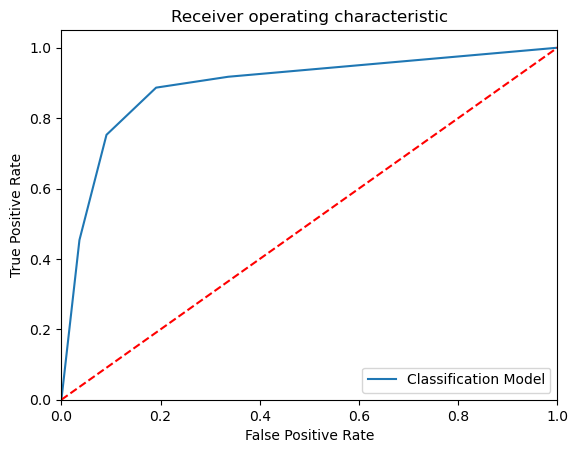

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[82 15]
 [15 95]]
Outcome values : 
 82 15 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.85      0.85        97
           0       0.86      0.86      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 84.5 %
Recall : 84.5 %
F1 Score : 0.845
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 85.4 %
MCC : 0.709
roc_auc_score: 0.854


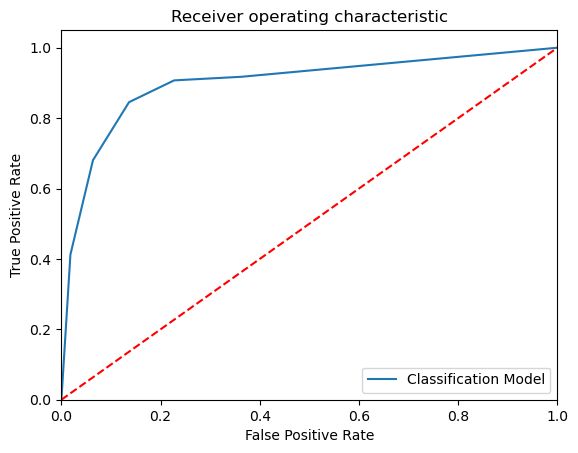

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[79 18]
 [11 99]]
Outcome values : 
 79 18 11 99
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.81      0.84        97
           0       0.85      0.90      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 87.8 %
Recall : 81.4 %
F1 Score : 0.845
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 85.7 %
MCC : 0.719
roc_auc_score: 0.857


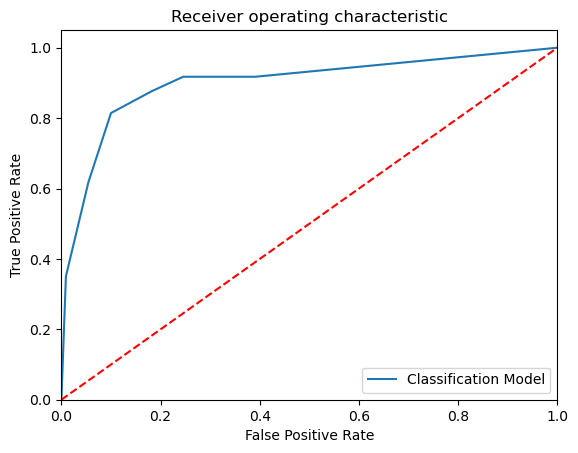

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[82 15]
 [19 91]]
Outcome values : 
 82 15 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.85      0.83        97
           0       0.86      0.83      0.84       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 83.6 %
Precision : 81.2 %
Recall : 84.5 %
F1 Score : 0.828
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 83.6 %
MCC : 0.672
roc_auc_score: 0.836


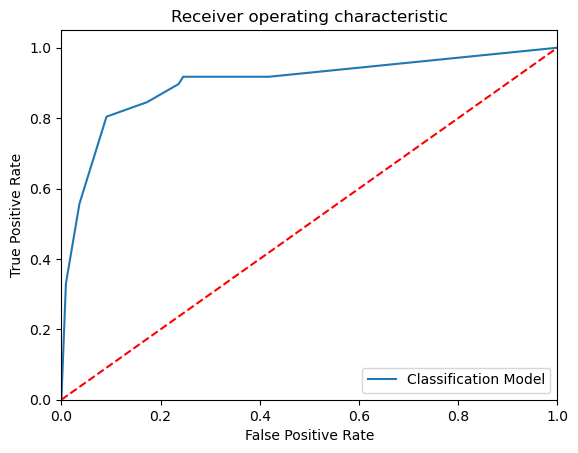

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[81 16]
 [17 93]]
Outcome values : 
 81 16 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.83        97
           0       0.85      0.85      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 84.1 %
Precision : 82.7 %
Recall : 83.5 %
F1 Score : 0.831
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 84.0 %
MCC : 0.68
roc_auc_score: 0.84


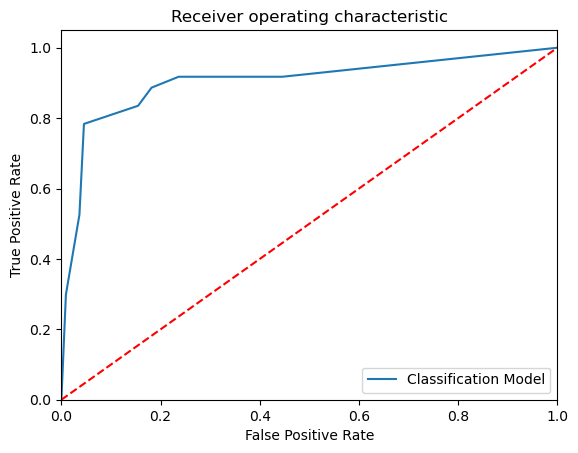

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[85 12]
 [20 90]]
Outcome values : 
 85 12 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.88      0.84        97
           0       0.88      0.82      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.0 %
Recall : 87.6 %
F1 Score : 0.842
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 84.7 %
MCC : 0.693
roc_auc_score: 0.847


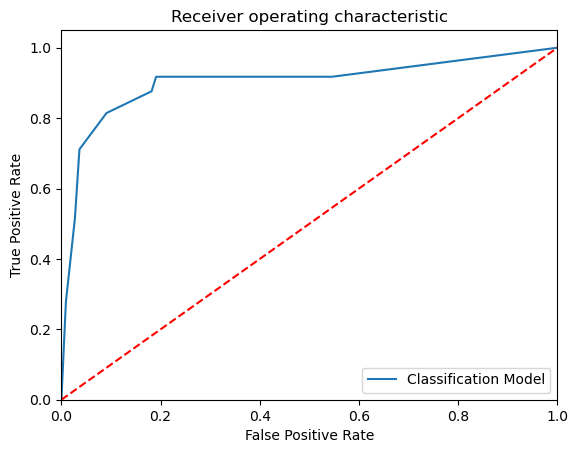

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[84 13]
 [15 95]]
Outcome values : 
 84 13 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.87      0.86        97
           0       0.88      0.86      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 84.8 %
Recall : 86.6 %
F1 Score : 0.857
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 86.5 %
MCC : 0.729
roc_auc_score: 0.865


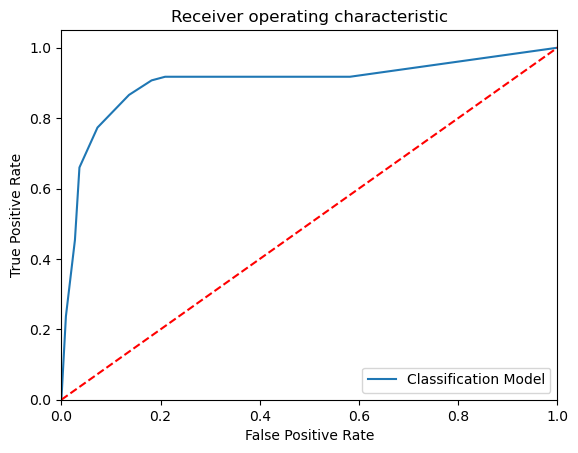

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[87 10]
 [18 92]]
Outcome values : 
 87 10 18 92
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.90      0.86        97
           0       0.90      0.84      0.87       110

    accuracy                           0.86       207
   macro avg       0.87      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 82.9 %
Recall : 89.7 %
F1 Score : 0.861
Specificity or True Negative Rate : 83.6 %
Balanced Accuracy : 86.6 %
MCC : 0.732
roc_auc_score: 0.867


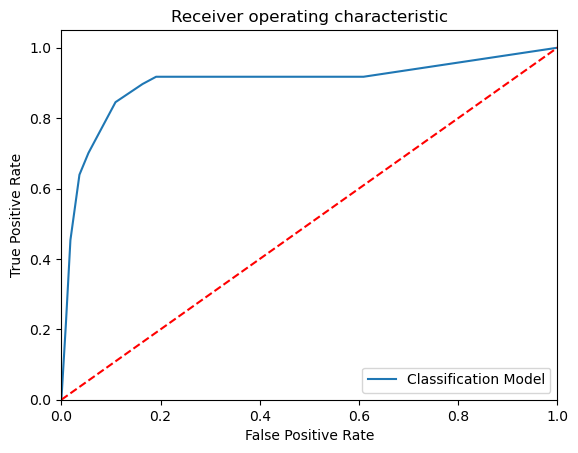

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[86 11]
 [17 93]]
Outcome values : 
 86 11 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           0       0.89      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 83.5 %
Recall : 88.7 %
F1 Score : 0.86
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 86.6 %
MCC : 0.731
roc_auc_score: 0.866


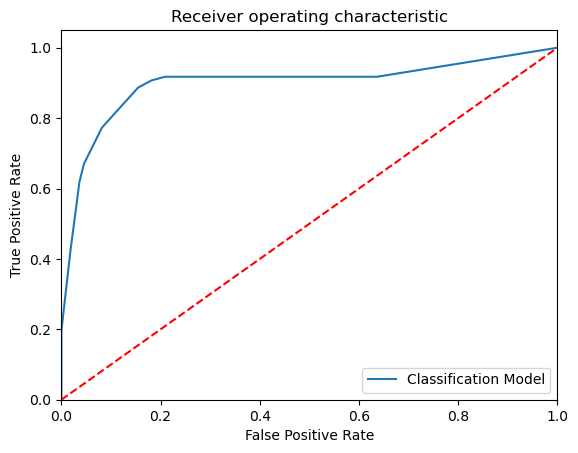

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[87 10]
 [20 90]]
Outcome values : 
 87 10 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.90      0.85        97
           0       0.90      0.82      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 81.3 %
Recall : 89.7 %
F1 Score : 0.853
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 85.7 %
MCC : 0.714
roc_auc_score: 0.858


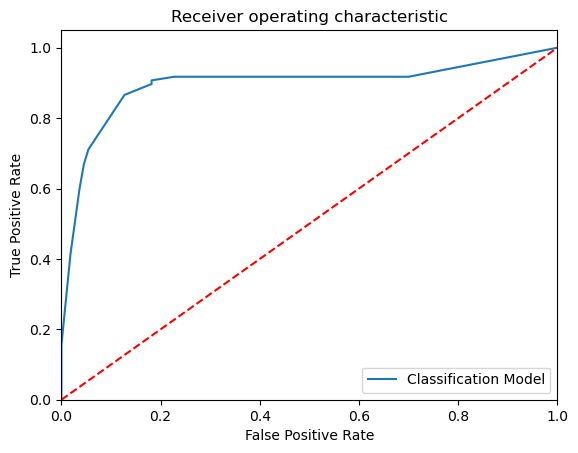

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[86 11]
 [17 93]]
Outcome values : 
 86 11 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86        97
           0       0.89      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 83.5 %
Recall : 88.7 %
F1 Score : 0.86
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 86.6 %
MCC : 0.731
roc_auc_score: 0.866


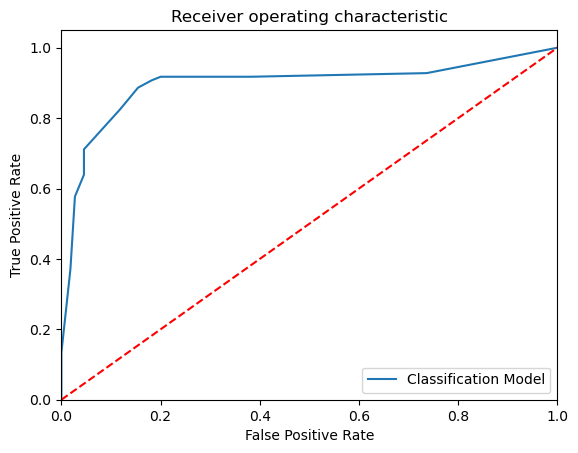

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[87 10]
 [19 91]]
Outcome values : 
 87 10 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        97
           0       0.90      0.83      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 82.1 %
Recall : 89.7 %
F1 Score : 0.857
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 86.2 %
MCC : 0.723
roc_auc_score: 0.862


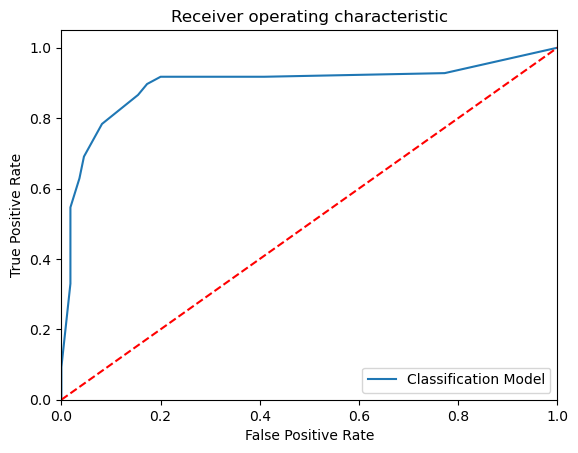

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[84 13]
 [19 91]]
Outcome values : 
 84 13 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.6 %
Recall : 86.6 %
F1 Score : 0.84
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.847


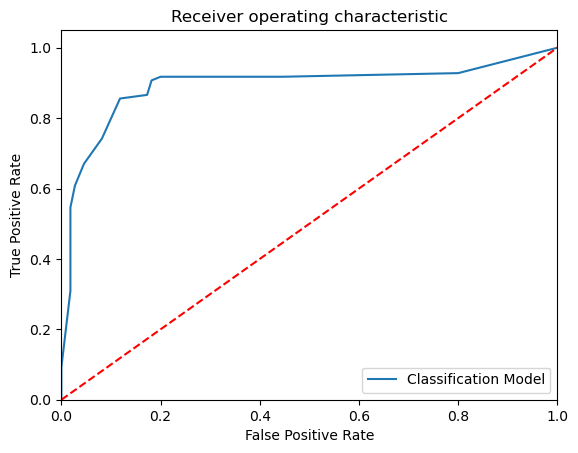

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[86 11]
 [20 90]]
Outcome values : 
 86 11 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.89      0.85        97
           0       0.89      0.82      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 81.1 %
Recall : 88.7 %
F1 Score : 0.847
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 85.2 %
MCC : 0.704
roc_auc_score: 0.852


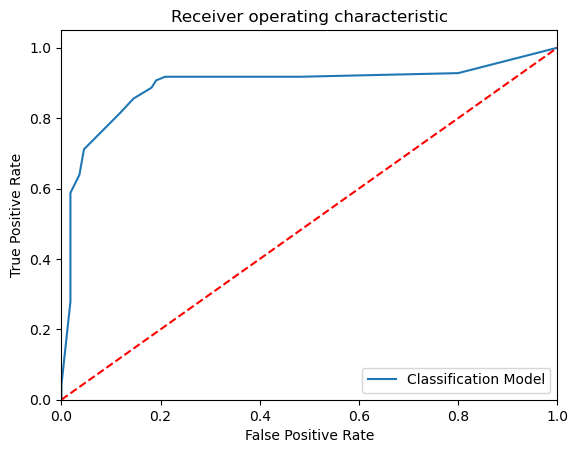

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[85 12]
 [16 94]]
Outcome values : 
 85 12 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.88      0.86        97
           0       0.89      0.85      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.87      0.86      0.86       207

Accuracy : 86.5 %
Precision : 84.2 %
Recall : 87.6 %
F1 Score : 0.859
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 86.5 %
MCC : 0.73
roc_auc_score: 0.865


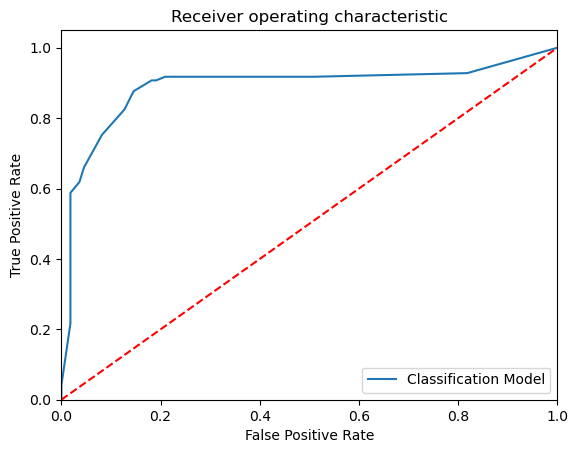

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[86 11]
 [19 91]]
Outcome values : 
 86 11 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.89      0.85        97
           0       0.89      0.83      0.86       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 81.9 %
Recall : 88.7 %
F1 Score : 0.851
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 85.7 %
MCC : 0.713
roc_auc_score: 0.857


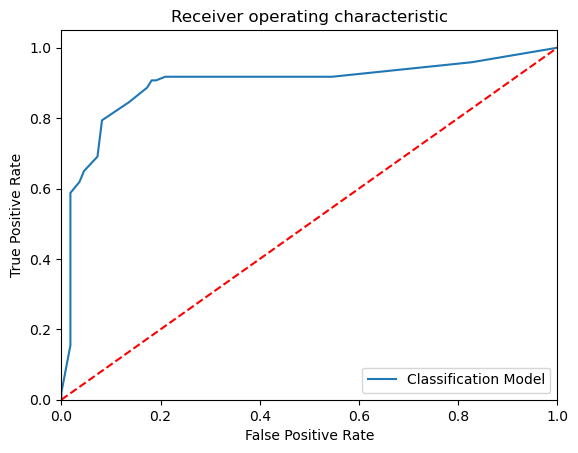

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[83 14]
 [17 93]]
Outcome values : 
 83 14 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.86      0.84        97
           0       0.87      0.85      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 83.0 %
Recall : 85.6 %
F1 Score : 0.843
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 85.0 %
MCC : 0.7
roc_auc_score: 0.851


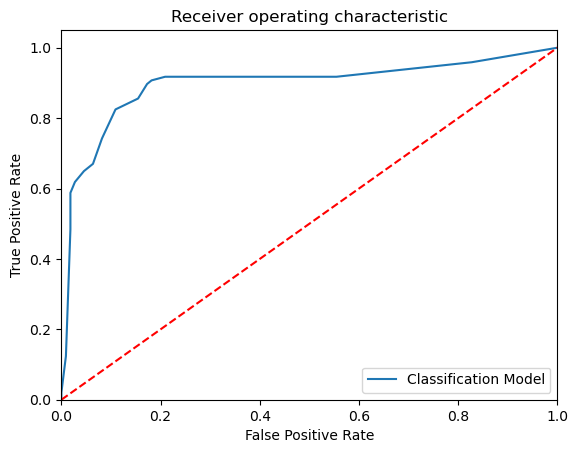

In [35]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [36]:
y_predKNN=ModelKNN.predict(x_test)

In [38]:
#display the final results

Results =pd.DataFrame({'Approved_A':y_test,'Approved_p':y_predKNN})

#merge two Dataframes on index of both the dataframes
ResultsFinal =Credit_card_bk.merge(Results,left_index=True,right_index=True)

#display 5 records randomly

ResultsFinal.sample(20)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_A,Approved_p
334,1,34.75,2.500,1,1,InformationTechnology,Asian,0.500,0,0,0,0,ByBirth,348,0,0,0,0
320,1,21.25,1.500,1,1,Industrials,White,1.500,0,0,0,0,ByBirth,150,8,1,1,0
686,0,22.67,0.750,1,1,Energy,White,2.000,0,1,2,1,ByBirth,200,394,0,0,0
335,1,27.67,0.750,1,1,Materials,Black,0.165,0,0,0,1,ByBirth,220,251,0,0,0
281,1,23.92,0.585,0,0,InformationTechnology,Black,0.125,0,0,0,0,ByBirth,240,1,0,0,0
572,1,21.92,0.540,0,0,Utilities,White,0.040,1,1,1,1,ByBirth,840,59,1,1,1
244,1,18.50,2.000,1,1,ConsumerDiscretionary,White,1.500,1,1,2,0,ByBirth,120,300,1,1,1
55,1,23.33,11.625,0,0,Industrials,White,0.835,1,0,0,1,ByBirth,160,300,1,1,0
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1,1,1
647,1,24.08,9.000,1,1,ConsumerStaples,White,0.250,0,0,0,1,ByBirth,0,0,0,0,0
